In [1]:
#IMPORTS

import numpy as np 
import pandas
import math

import matplotlib.pyplot as plt
import os
import scipy
from scipy import signal
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import Resizing
import random
import cv2
from PIL import Image

from skimage import feature
from skimage import color
from skimage import io

def load_image( path ) :
    img = Image.open( path )
    img.load()
    data = np.asarray( img, dtype="int32" )
    return data

 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [197]:
def context_coords(x, y, image_dim):
    classification_shape = (20,20,3)
    context_shape        = (60,60,3)

    #40 - 20 - 40
    context_x = int( max(0, x - ( context_shape[0] - classification_shape[0] )/2 ) )
    context_y = int( max(0, y - ( context_shape[1] - classification_shape[1] )/2 ) )

    max_x = image_dim[0] - context_shape[0]
    max_y = image_dim[1] - context_shape[1]

    return min(context_x,max_y),min(context_y,max_y)

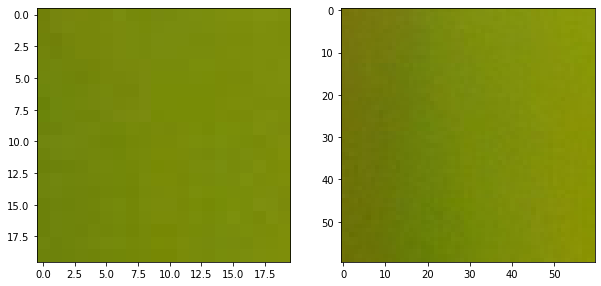

In [199]:
data_root='/content/drive/My Drive/corn/data/images/'
for dirpath, _, filenames in os.walk(data_root):
    for filename in filenames:
        image_path = os.path.join(dirpath, filename)
        a = load_image(image_path)
        break
    break

rand = random.randint(0,min(a.shape[0],a.shape[1]))
x = rand
y = rand
d = 20
#plt.imshow(a[x:x+d,y:x+d,:])
cx,cy = context_coords(x,y,a.shape)
cd = 60

Image1 = a[x:x+d,y:x+d,:]
Image2 = a[cx:cx+cd,cy:cx+cd,:]

fig = plt.figure(figsize=(10, 7))

# Adds a subplot at the 1st position
fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(Image1)

  
# Adds a subplot at the 2nd position
fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(Image2)






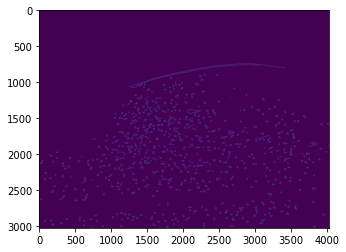

In [200]:
img = color.rgb2gray(a * 1/256)
edges = feature.canny(img,sigma=4)
plt.imshow(edges)

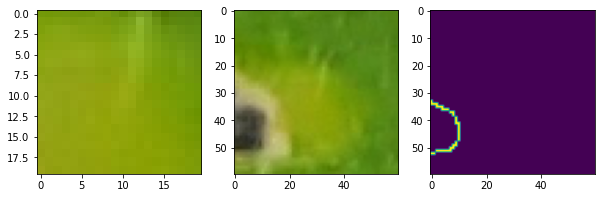

In [231]:
while True:
    rand = random.randint(0,min(a.shape[0],a.shape[1]))
    x = rand
    y = rand
    d = 20
    cx,cy = context_coords(x,y,a.shape)
    cd = 60
    Image1 = edges[x:x+d,y:x+d]
    Image2 = edges[cx:cx+cd,cy:cx+cd]

    if np.max(Image1) == 1:
        continue
    if np.max(Image2) == 0:
        continue
    else:

        fig = plt.figure(figsize=(10, 7))

        # Adds a subplot at the 1st position
        fig.add_subplot(1, 3, 1)
        
        # showing image
        plt.imshow(a[x:x+d,y:x+d,:])

        
        # Adds a subplot at the 2nd position
        fig.add_subplot(1, 3, 2)
        
        # showing image
        plt.imshow(a[cx:cx+cd,cy:cx+cd,:])

        fig.add_subplot(1, 3, 3)
        
        # showing image
        plt.imshow(edges[cx:cx+cd,cy:cx+cd])

    break

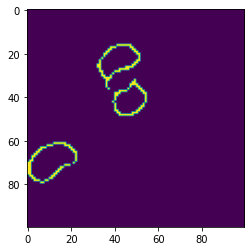

In [181]:
from skimage.morphology import binary_closing
closed = binary_closing(binary_closing(binary_closing(edges[cx:cx+cd,cy:cx+cd])))
plt.imshow(closed)

In [ ]:
#NOTES

#Classification, unlesion data, have context image have lesions in it, so model can detect no lesions even w/ lesions in conteext
#2 ideas for context:
#1: red square around classification area in context image, so class area can be tiny and context large, so high res heatmap while keeping contet info

#thats how u feed images to human labeller too, "what kind of lesion in this red square"
#pretty easy decision problem.... so should be able to extrapolate well off low data n, especially with contrastive learning stuff
#maybe just a few hours of manual labelling, 

#exploit biased image distributions... some images have tons of one kind (green eye, disk), so sample heavily from this in labelling to get lots of all types

#should do lots of smart data aug, cant go crazy bc signal will be lost (color is important)
#safe seems to be rotation, shifts/rotation but dont introduce black padding


#GROUNDTRUTH problems
#determine tighter definitions of types, what kinds as brown eye, specifically, disk and green eye seem well defined in set, but lots have tiny brown rim, others large lighter rim

#on filling edges, can do morphological closing, then on whole image select point likely not to be enclosed*, fill image from there, then invert image to fill all circles
#*very edge point, could run multiple times and ensure ratio of filled to not filled makes sense, could manually select point not lesion in any image, corner prob just works tho